# **<center>Implementation of ANN using Keras Fashion MNIST Dataset** </center>
**<br>2023F-T3 AML 3104 - Neural Networks and Deep Learning 01**
<br>&emsp;&emsp;Maricris Resma
<br>&emsp;&emsp;C0872252


In [35]:
# Importing Libraries
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

### 1. Load and Explore the Fashion MNIST Dataset:

In [36]:
from keras.datasets import fashion_mnist


In [37]:
fashion_mnist_data = fashion_mnist.load_data()

In [38]:

# load dataset
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist_data

In [39]:
# summarize loaded dataset
print('Train: X=%s, y=%s' % (X_train_full.shape, y_train_full.shape))
print('Test: X=%s, y=%s' % (X_test.shape, y_test.shape))

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


In [40]:
X_train_full.shape

(60000, 28, 28)

In [41]:
y_train_full.shape

(60000,)

In [42]:
np.unique(y_train_full)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [43]:
# Identify correspnding class for the y labels
# https://www.tensorflow.org/tutorials/keras/classification

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

***Observation:***

- There are 60,000 examples in the training dataset and 10,000 in the test dataset
- each images all have the same square size of 28×28 pixels
- each image contains a single item of clothing
- there are 10 classes and that classes are represented as unique integers.

### 2. Data Preprocessing

Scale these values to a range of 0 to 1 before feeding them to the neural network model

In [44]:
# Scale the data between 0 to 1 by dividing it by 255
X_train = X_train_full/255
y_train = y_train_full

# scale the test set as well
X_test = X_test/255

### 3. Visualizations:

View the images from the data

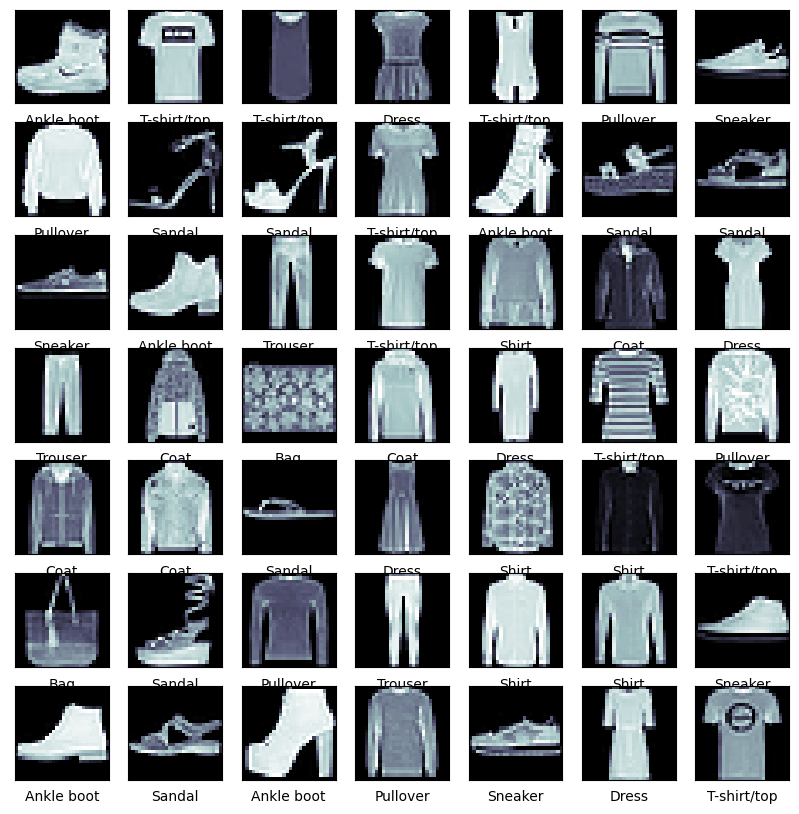

In [45]:
plt.figure(figsize=(10,10))
for i in range(49):
    plt.subplot(7,7,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap='bone')
    plt.xlabel(class_names[y_train[i]])
plt.show()


Plot Bar chart to show distribution of each class in the train data

In [71]:
unique_elements, counts_elements = np.unique(y_train, return_counts=True)

In [72]:
result = np.asarray((unique_elements, counts_elements))

In [73]:
result = np.swapaxes(result,1,0)

In [74]:
df = pd.DataFrame(result)

<AxesSubplot: title={'center': 'Fashion Class Count'}>

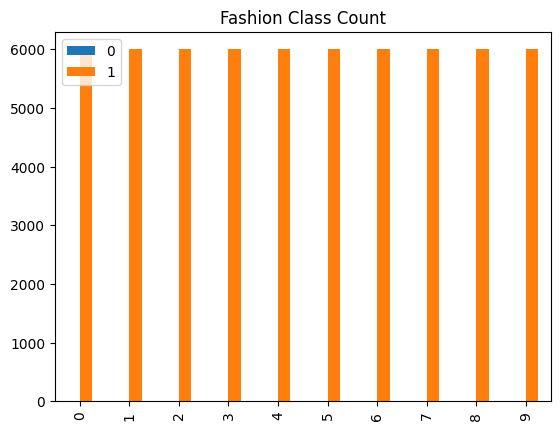

In [75]:
df.plot(kind='bar', title="Fashion Class Count")

### 4. Build an Artificial Neural Network:

In [55]:
# Creating layers of ANN
model_clf = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [56]:
model_clf.layers

In [57]:
model_clf.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


***Layers Description:***
- tf.keras.layers.Flatten - transforms the format of the images from a two-dimensional array (of 28 by 28 pixels) to a one-dimensional array (of 28 * 28 = 784 pixels)
- tf.keras.layers.Dense layer 1 - 128 neurons
- tf.keras.layers.Dense layer 1 - returns a logits array with length of 10

### 5. Compile the Model

In [58]:
model_clf.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### 6. Train the Model

Feed the Model

In [59]:
model_clf.fit(X_train, y_train, epochs=10)

Epoch 1/10


1875/1875 [==============================] - 5s 2ms/step - loss: 0.4969 - accuracy: 0.8244
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3724 - accuracy: 0.8654
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3346 - accuracy: 0.8784
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3129 - accuracy: 0.8836
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2930 - accuracy: 0.8921
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2799 - accuracy: 0.8971
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2687 - accuracy: 0.9005
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2584 - accuracy: 0.9046
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2469 - accuracy: 0.9083
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2403 - accurac

### 7. Evaluate the Model

In [60]:
test_loss, test_acc = model_clf.evaluate(X_test,  y_test, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3291 - accuracy: 0.8824 - 556ms/epoch - 2ms/step

Test accuracy: 0.8823999762535095


***Observation:***
- Fairly good accuracy of 0.89 

### 8. Test set prediction

In [61]:
probability_model = tf.keras.Sequential([model_clf, tf.keras.layers.Softmax()])

In [62]:
y_predict = probability_model.predict(X_test)

313/313 [==============================] - 1s 1ms/step


In [69]:
# A prediction for each data is an array of 10 numbers representing model's "confidence" that the image corresponds to each of the 10 different articles of clothing. You can see which label has the highest confidence value:
y_predict[0]

array([8.7779625e-07, 1.3384233e-06, 8.1837870e-09, 1.2719829e-09,
       4.2512497e-06, 3.9944798e-03, 1.1142970e-06, 1.9472507e-03,
       1.0434472e-06, 9.9404967e-01], dtype=float32)

In [64]:
# Check predicted class
np.argmax(y_predict[0])

9

In [65]:
# Verify actual class
y_test[0]

9

Display predictions

In [66]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap='bone')

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

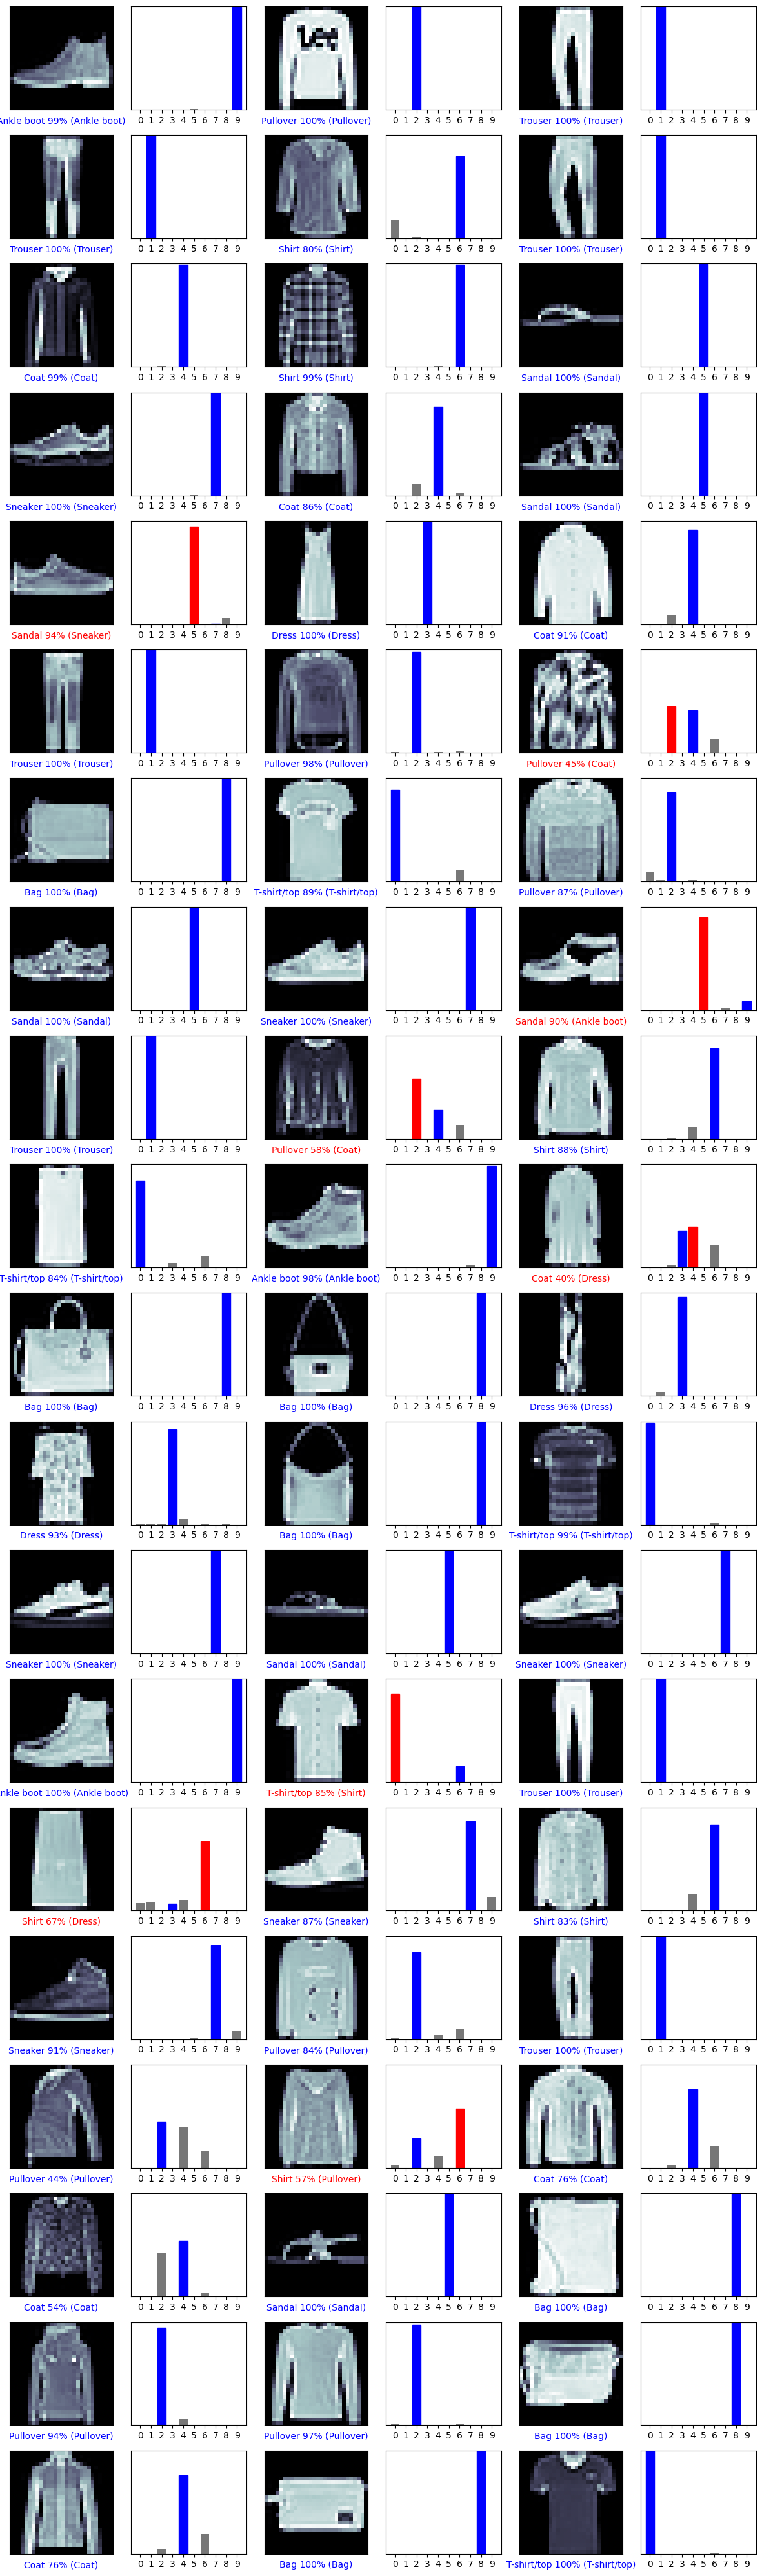

In [67]:
# Plot the first X test images, their predicted y and actual y classification result
num_rows = 20
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for idx in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*idx+1)
  plot_image(idx, y_predict[idx], y_test, X_test)
  plt.subplot(num_rows, 2*num_cols, 2*idx+2)
  plot_value_array(idx, y_predict[idx], y_test)
plt.tight_layout()
plt.show()

***Observations:***
- Blue - correct prediction
- Red - incorrect prediction
- First set batch of data shows majority is accurate(blue color)